# 實作網路爬蟲結合詞雲(WordCloud)與TF-IDF演算法提取關鍵字
##### 作者: Eason Chu
*made for 國立政治大學 National ChengChi University 1111701893001_人工智慧應用專題_個人報告一* 




####首先，我們來實作網路爬蟲，以GoogleNews為例

1.先下載並import相關模組

In [ ]:
!pip install GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 5.2 MB/s 
     |████████████████████████████████| 749 kB 52.5 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random
import re
from GoogleNews import GoogleNews
from datetime import datetime, timedelta
import time

In [ ]:
hours_ago = datetime.now() - timedelta(hours = 48)
print(hours_ago)

hours_ago_time = hours_ago.strftime("%Y/%m/%d %H:%M")
datetime = datetime.now().strftime("%Y/%m/%d %H:%M")
print("現在時間：",datetime)
print("48小時前時間：", hours_ago_time)


2022-10-19 05:58:08.440633
現在時間： 2022/10/21 05:58
48小時前時間： 2022/10/19 05:58


2. 利用關鍵字搜尋Google新聞，並將所爬取到的資料先存入DataFrame

In [ ]:
googlenews = GoogleNews()
googlenews.setlang('zh_TW')
googlenews.setencode('utf-8')
googlenews.set_period('7d')
googlenews.clear()

x = input("請輸入要搜尋的關鍵字:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get_links()
contents = []
# print(type(result))
# print(len(result))
# print(alldata)

print()
user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}
for n in range(len(result)):
    url = links[n]
    r = requests.get(url, headers=user_agent)
    r.encoding = "utf-8"
    web_content = r.text
    soup = BeautifulSoup(web_content,'html')
    articleContent = soup.find_all('p')
    article = []
    for p in articleContent:
        article.append(p.text)

    articleAll = '\n'.join(article)
    contents.append(articleAll)
    print(result[n])
    print(links[n])
    time.sleep(2)
   
df = pd.DataFrame(
{
    '標題': result,
    '連結': links,
    '內文': contents
})
g = len(df)
df


請輸入要搜尋的關鍵字:MLB

Anthony Rizzo秀棒球基本功 滾地球掩護著洋基打破鴨蛋【MLB球星精華】20221021
https://tw.sports.yahoo.com/video/anthony-rizzo%E7%A7%80%E6%A3%92%E7%90%83%E5%9F%BA%E6%9C%AC%E5%8A%9F-%E6%BB%BE%E5%9C%B0%E7%90%83%E6%8E%A9%E8%AD%B7%E8%91%97%E6%B4%8B%E5%9F%BA%E6%89%93%E7%A0%B4%E9%B4%A8%E8%9B%8B-mlb%E7%90%83%E6%98%9F%E7%B2%BE%E8%8F%AF-20221021-054932962.html
太空人布瑞格炸3分砲！ 洋基美聯冠軍賽吞2連敗
https://tw.news.yahoo.com/%E5%A4%AA%E7%A9%BA%E4%BA%BA%E5%B8%83%E7%91%9E%E6%A0%BC%E7%82%B83%E5%88%86%E7%A0%B2-%E6%B4%8B%E5%9F%BA%E7%BE%8E%E8%81%AF%E5%86%A0%E8%BB%8D%E8%B3%BD%E5%90%9E2%E9%80%A3%E6%95%97-045537920.html
萊萬：上屆世界盃是我生涯最大失望之一，阿根廷是奪冠熱門球隊
https://tw.sports.yahoo.com/news/%E8%90%8A%E8%90%AC-%E4%B8%8A%E5%B1%86%E4%B8%96%E7%95%8C%E7%9B%83%E6%98%AF%E6%88%91%E7%94%9F%E6%B6%AF%E6%9C%80%E5%A4%A7%E5%A4%B1%E6%9C%9B%E4%B9%8B-%E9%98%BF%E6%A0%B9%E5%BB%B7%E6%98%AF%E5%A5%AA%E5%86%A0%E7%86%B1%E9%96%80%E7%90%83%E9%9A%8A-034059560.html
MLB》布瑞格曼3分砲轟破紀錄 太空人主場2連勝洋基
https://tw.news.yahoo.com/mlb-%E5%B8%83%E7%91%9E%E6%A0%BC%E6%9B%BC3%E5%88%86%

,標題,連結,內文
0,Anthony Rizzo秀棒球基本功 滾地球掩護著洋基打破鴨蛋【MLB球星精華】20221021,https://tw.sports.yahoo.com/video/anthony-rizz...,
1,太空人布瑞格炸3分砲！ 洋基美聯冠軍賽吞2連敗,https://tw.news.yahoo.com/%E5%A4%AA%E7%A9%BA%E...,體育中心／吳宣萱報導\n美聯冠軍賽首戰洋基以0：2不敵太空人，21日第2戰太空人靠著布瑞格曼...
2,萊萬：上屆世界盃是我生涯最大失望之一，阿根廷是奪冠熱門球隊,https://tw.sports.yahoo.com/news/%E8%90%8A%E8%...,現年34歲的萊萬多夫斯基下個月將隨隊參加世界盃，他提到阿根廷是奪冠的熱門。\n \n（萊萬。...
3,MLB》布瑞格曼3分砲轟破紀錄 太空人主場2連勝洋基,https://tw.news.yahoo.com/mlb-%E5%B8%83%E7%91%...,挑戰連續2季闖進世界大賽的太空人，今日在美聯冠軍賽第2戰推出創下單季最多連續25場優質先發紀...
4,大谷難以接近的存在！席林大讚MVP,https://tw.news.yahoo.com/%E5%A4%A7%E8%B0%B7%E...,天使隊日籍二刀流好手大谷翔平今年鬼神般的成績已經讓不少球迷跟球評十分難以至信，尤其他單季15...
5,一發三分彈氣走洋基 太空人率先取得兩勝,https://tw.news.yahoo.com/%E7%99%BC%E4%B8%89%E...,美國職棒（MLB）季後賽熱鬧開打中，由休士頓太空人（Houston Astros）對抗紐約洋...
6,MLB／洋基又挨13K連輸2場 教頭怪「開屋頂害了我們」,https://www.worldjournal.com/wj/story/121226/6...,打開微信，點擊底部的「發現」，使用「掃一掃」即可將網頁分享至好友\n面對太空人隊投手瓦德茲（...
7,布萊格曼3分砲轟垮洋基 太空人美聯冠軍賽2連勝,https://tw.news.yahoo.com/%E5%B8%83%E8%90%8A%E...,（中央社休士頓20日綜合外電報導）MLB太空人今天靠布萊格曼轟出一發3分砲，加上先發投手巴爾...
8,MLB》法官差點逆轉轟卻遭美技沒收 洋基教頭怪太空人開「屋頂」,https://sports.ltn.com.tw/news/breakingnews/40...,﻿\n\n\n爆\nKyle Tucker keeps it in the park! #P...
9,洋基首戰狂吞17K不敵太空人 外媒緩頰：他們凌晨才到休士頓,https://tw.sports.yahoo.com/news/%E6%B4%8B%E5%...,體育中心／吳宣萱報導\n美聯冠軍系列賽首戰20日開打，洋基以0：2不敵太空人，根據美國媒體《...


####接著，我們利用jieba 來進行文章分詞 
1. 首先一樣下載各種會用到的模組

In [ ]:
import jieba
import urllib.request
import urllib

#下載文字庫
response = requests.get(
    f'https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt')

print ("下載中!")
url = "https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt"
filename, headers = urllib.request.urlretrieve(url, filename="dict.txt")
print (headers)
url = "https://raw.githubusercontent.com/wastu01/Python-WordCloud/master/stopword.txt"
filename, headers = urllib.request.urlretrieve(url, filename="stopword.txt")
print (headers)
print ("下載完成!")
jieba.load_userdict('dict.txt')

下載中!


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...


Connection: close
Content-Length: 4154480
Cache-Control: max-age=300
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; sandbox
Content-Type: text/plain; charset=utf-8
ETag: "86aa799feb58eaf0ae08ffecb037cc4b5d128d5755c94ce75ff52dfd865a1dbb"
Strict-Transport-Security: max-age=31536000
X-Content-Type-Options: nosniff
X-Frame-Options: deny
X-XSS-Protection: 1; mode=block
X-GitHub-Request-Id: 081B:086A:2921E6:372CB3:63523516
Accept-Ranges: bytes
Date: Fri, 21 Oct 2022 05:58:46 GMT
Via: 1.1 varnish
X-Served-By: cache-fty21331-FTY
X-Cache: MISS
X-Cache-Hits: 0
X-Timer: S1666331927.628091,VS0,VE168
Vary: Authorization,Accept-Encoding,Origin
Access-Control-Allow-Origin: *
X-Fastly-Request-ID: fd2d05ebe9449dcb73590ee74cd773820bda55da
Expires: Fri, 21 Oct 2022 06:03:46 GMT
Source-Age: 0


Connection: close
Content-Length: 249
Cache-Control: max-age=300
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; sandbox
Content-Type: text/plain; charset=utf-8
ETag

Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.117 seconds.
DEBUG:jieba:Loading model cost 1.117 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


2. 接著利用jieba進行中文分詞

我們首先把爬到的前十筆資料整合，再利用jieba進行分詞動作

In [ ]:
d = [df['內文'][0].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','')]
for t in range(1,g):
  d.append(df['內文'][t].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】',''))


#d = df['內文'][0].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','')
jieba.setLogLevel(20)
d1 = ''.join(d)
Sentence = jieba.cut(d1)
print(": "  + "/ ".join(Sentence) + '\n')   
print(Sentence)

: 體育/ 中心/ 吳/ 宣萱/ 報導/ 
/ 美聯冠/ 軍賽/ 首戰/ 洋基/ 以/ 02/ 不敵/ 太空/ 人/ 21/ 日/ 第/ 2/ 戰/ 太空/ 人靠/ 著布/ 瑞格/ 曼/ Alex/  / Bregman/ 在/ 3/ 局下/ 的/ 3/ 分彈/ 先/ 發制/ 人/ 終場/ 以/ 32/ 氣走/ 洋基/ 拿下/ 2/ 連勝/ 
/ 前/ 2/ 局雙方/ 雖/ 都/ 有/ 站上/ 得點/ 圈/ 但/ 都/ 無功/ 而/ 返/ 3/ 局下/ 太空/ 人/ 首位/ 打者/ 馬/ 多納多/ Martin/  / Maldonado/ 遭觸/ 身球/ 上/ 壘/ 菜/ 鳥/ 潘尼亞/ Jeremy/  / Pena/ 在/ 1/ 出局/ 後/ 敲安而布/ 瑞格/ 曼在/ 2/ 好/ 1/ 壞時/ 敲出/ 打破/ 僵局/ 的/ 全壘/ 打/ 幫球隊/ 先馳/ 得/ 點並/ 取得/ 3/ 分領/ 先/ 
/ 不過/ 洋基/ 也/ 不是/ 省油/ 的/ 燈/ 4/ 局上/ 瑞佐/ Anthony/  / Rizzo/ 敲出/ 內野滾/ 地球/ 以及/ 托/ 瑞斯/ Gleyber/  / Torres/ 的/ 內野安/ 打將/ 比數/ 追成/ 23/ 可惜/ 洋基/ 隊/ 之/ 後/ 的/ 攻勢/ 全遭/ 太空/ 人/ 瓦解/ 
/ 兩隊/ 先發/ 投手/ 在/ 經歷/ 失分/ 後/ 狀態/ 回穩/ 加上/ 適時/ 啟用/ 牛棚/ 投手/ 有效/ 封鎖/ 打線/ 比數/ 自/ 4/ 局後就/ 沒有/ 任何/ 變化/ 
/ 太空/ 人先發/ 投手/ 瓦帝茲/ Framber/  / Valdez/ 繳出/ 7/ 局失/ 2/ 分/ 0/ 責失/ 加上/ 9K/ 好/ 投/ 9/ 局上則/ 推出/ 終結者/ 普雷斯利/ Ryan/  / Pressly/ 他/ 雖/ 投出/ 1/ 次/ 保送/ 再/ 送/ 出/ 3K/ 收下/ 勝利/ 而/ 洋基/ 先發/ 投手/ 塞維里諾/ Luis/  / Severino/ 則是/ 主投/ 51/ 局遭/ 轟/ 3/ 分/ 砲/ 吞下/ 敗戰/ 
/ 更/ 多/ 三/ 立新/ 聞網/ 報導恩/ 比德/ 狂/ 打鐵/ 哈登/ 飆/ 31/ 分無用/  / 76/ 人輸球/ 苦/ 吞/ 2/ 連敗/ 洋基/ 首戰狂/ 吞/ 17K/ 

#### 然後我們來繪製詞雲
為什麼要繪製詞雲呢? 詞雲可以直接用圖示讓讀者快速知道此文有哪些關鍵字。
1. 首先一樣下載各種會用到的模組

In [ ]:
import numpy as np
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
from io import StringIO
import jieba.analyse
from wordcloud import WordCloud, ImageColorGenerator
from scipy.ndimage import gaussian_gradient_magnitude
with open('stopword.txt', 'r', encoding="utf-8") as f:
    stopwords = f.read().split('\n')
from imageio import imread
import shutil 

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2022-10-21 05:59:13--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.26.102, 74.125.26.113, 74.125.26.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t6si1g2esep05nmgncemi94r0e2d7nce/1666331925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4b7784be-e549-49e9-bf78-553d8972bfd4 [following]
--2022-10-21 05:59:14--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t6si1g2esep05nmgncemi94r0e2d7nce/1666331925000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=4b7784be-e549-49e9-bf78-553d8972bfd4
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to doc-0k-9o-

2. 接著我們利用jieba自帶的方法抓取關鍵字

In [ ]:
def textDict(content):
    result = jieba.analyse.textrank(content, topK=1000, withWeight=True)

    keywords = dict()
    for i in result:
        keywords[i[0]] = i[1]
    return keywords

3.然後我們定義繪製詞雲的方法

In [ ]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(51, 100%%, %d%%)' % random.randint(40, 60)

In [ ]:
def renderWordCloud(keywords,maskImg):
    image = Image.open(maskImg)

    mask_color = np.array(Image.open(maskImg))
    mask_color = mask_color[::3, ::3]
    mask_image = mask_color.copy()
    mask_image[mask_image.sum(axis=2) == 0] = 255
    edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
    mask_image[edges > .08] = 255
    
    graph = np.array(image)

    
    fontPath = 'TaipeiSansTCBeta-Regular.ttf'
    wc = WordCloud(
        scale=4,
        font_path=fontPath,
        background_color='white',
        max_words=2000,
        width=2000, height=2000,
        max_font_size=40,
        random_state=42,
        relative_scaling=0,
        mask=mask_image
    )
    
    wc.generate_from_frequencies(keywords)

    
    image_colors = ImageColorGenerator(mask_image)
    wc.recolor(color_func=image_colors)

    plt.figure(figsize=(15,15))
    plt.imshow(wc)
    plt.imshow(wc.recolor(color_func=image_colors))
    plt.axis('off')
    plt.show()

4.抓取背景圖套在詞雲上

In [ ]:
url1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Google_Chrome_icon_%28February_2022%29.svg/800px-Google_Chrome_icon_%28February_2022%29.svg.png' 
#https://img.freepik.com/free-vector/wireless-network-symbol_1284-42447.jpg?w=2000
response = requests.get(url1, stream=True)
with open('mask_image.png', 'wb') as file:
    shutil.copyfileobj(response.raw, file)
del response

mask_image = 'mask_image.png'

5. 最後！成功繪製詞雲

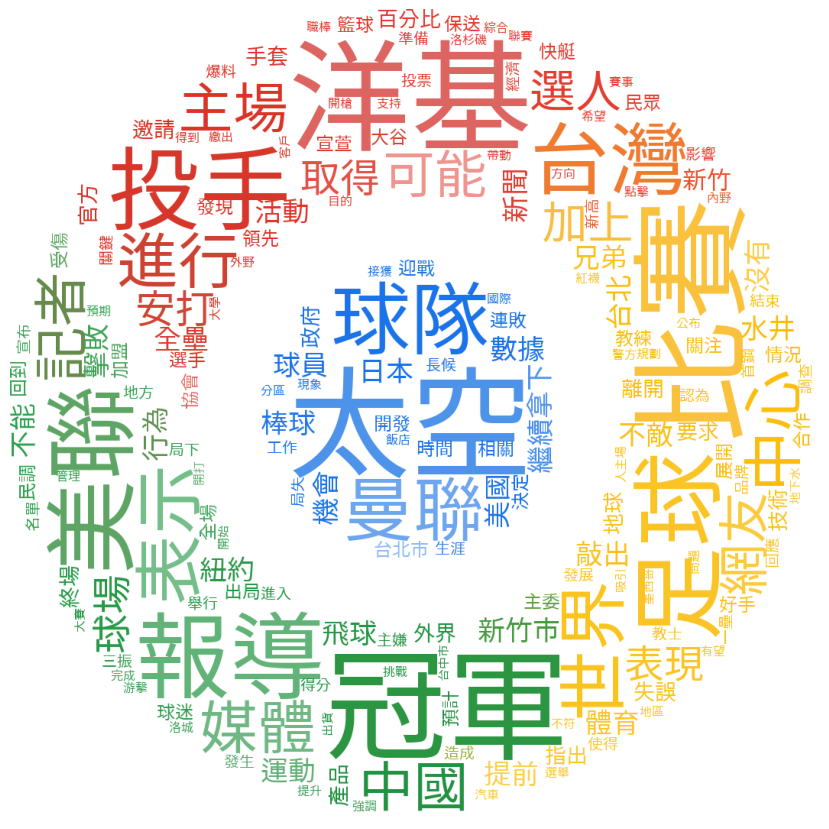

In [ ]:
keywords = textDict(d1)
renderWordCloud(keywords,mask_image)

#### 然後我們開始著手計算TF-IDF
原本希望可以利用TfidfVectorizer module直接進行計算，但其並非使用原始的tf-idf算法，因此會有所紕漏。

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

##### 我們以前五篇文章進行TF-IDF實作，可以自行刪減，先將所有內文利用jieba進行斷句

In [ ]:
d1 = df['內文'][0].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','').replace(' ','')
d2 = df['內文'][1].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','').replace(' ','')
d3 = df['內文'][2].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','').replace(' ','')
d4 = df['內文'][3].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','').replace(' ','')
d5 = df['內文'][4].replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('%','百分比').replace('.','').replace('；','').replace('?','').replace('【','').replace('】','').replace(' ','')


jieba.setLogLevel(20)
Sentence1 = jieba.lcut(d1)
Sentence2 = jieba.lcut(d2)
Sentence3 = jieba.lcut(d3)
Sentence4 = jieba.lcut(d4)
Sentence5 = jieba.lcut(d5)


In [ ]:
unique_words = set(Sentence1).union(set(Sentence2),set(Sentence3),set(Sentence4),set(Sentence5))

In [ ]:
num_words_1 = dict.fromkeys(unique_words, 0)
num_words_2 = dict.fromkeys(unique_words, 0)
num_words_3 = dict.fromkeys(unique_words, 0)
num_words_4 = dict.fromkeys(unique_words, 0)
num_words_5 = dict.fromkeys(unique_words, 0)

for word in Sentence1:
    num_words_1[word] += 1
    
for word in Sentence2:
    num_words_2[word] += 1
for word in Sentence3:
    num_words_3[word] += 1
    
for word in Sentence1:
    num_words_1[word] += 1
    
for word in Sentence4:
    num_words_4[word] += 1

for word in Sentence5:
    num_words_5[word] += 1


##### 計算出TF值(公式如下)

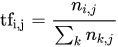

In [ ]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        if bagOfWordsCount != 0:
          tfDict[word] = count / float(bagOfWordsCount)
        else:
          tfDict[word] = 0
    return tfDict


In [ ]:
tf1 = computeTF(num_words_1, Sentence1)
tf2 = computeTF(num_words_2, Sentence2)
tf3 = computeTF(num_words_3, Sentence3)
tf4 = computeTF(num_words_4, Sentence4)
tf5 = computeTF(num_words_5, Sentence5)

##### 計算出IDF值(公式如下)

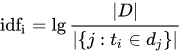

In [ ]:
def computeIDF(documents):
    import math
    N = len(documents)

    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1

    for word, val in idfDict.items():
      if val > 0:
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [ ]:
idfs = computeIDF([num_words_1,num_words_2,num_words_3,num_words_4,num_words_5])

##### 計算出TF-IDF值(公式如下) 也就是將TF與IDF相乘

image.png

In [ ]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [ ]:
tfidf1 = computeTFIDF(tf1, idfs)
tfidf2 = computeTFIDF(tf2, idfs)
tfidf3 = computeTFIDF(tf3, idfs)
tfidf4 = computeTFIDF(tf4, idfs)
tfidf5 = computeTFIDF(tf5, idfs)
df = pd.DataFrame([tfidf1, tfidf2, tfidf3, tfidf4, tfidf5])

##### 最後，我們算出了前五篇文章的TF-IDF值。


In [ ]:
df

,單不會,EduardoN,分彈,12,辭,高雄,籃板,大位,不開心,三點,...,民視,B,試產,全勝,再度,他將,群,瓦帝茲,特承諾,全力
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000541,0.000000,0.000000,0.000000,0.000000,0.000951,0.000000,0.000000,...,0.001901,0.000000,0.000951,0.000000,0.000603,0.000000,0.000000,0.000951,0.000951,0.000541
2,0.000852,0.000000,0.000000,0.001082,0.000000,0.000000,0.000000,0.000000,0.000852,0.000000,...,0.000000,0.000852,0.000000,0.000000,0.000000,0.000852,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000653,0.000364,0.000000,0.001306,0.000653,0.000000,0.000000,0.001147,...,0.000000,0.000000,0.000000,0.001147,0.000728,0.000000,0.001147,0.000000,0.000000,0.000653
4,0.000000,0.001139,0.000000,0.001085,0.001139,0.000648,0.000648,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000723,0.000000,0.000000,0.000000,0.000000,0.000000


匯出所抓取到的值

In [ ]:
df.to_csv(r'tfidf.txt', header=None, sep=' ', index=None, mode='a')

#### 最後，我們可以比較TF-IDF與詞雲所得出的關鍵字差異。